# Lib

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, f1_score
from math import sqrt
import time
from sklearn.metrics import mean_squared_error, f1_score
from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, LSTM
# from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
# from sklearn.model_selection import GridSearchCV

In [2]:
# path = r'C:\Users\C920093\OneDrive - Anheuser-Busch InBev\VAT Swarup Project'
data_name = r'Prediction_Dataset.csv'

In [3]:
data = pd.read_csv(data_name)
data.head(5)

Date          BTC         NYSE       NASDAQ     LSE    BTC_Volume  \
0  01-02-2018  14982.09961  12902.71973  7006.899902  3742.0  1.684660e+10   
1  01-03-2018  15201.00000  12957.28027  7065.529785  3749.0  1.687190e+10   
2  01-04-2018  15599.20020  13028.45996  7077.910156  3749.0  2.178320e+10   
3  01-05-2018  17429.50000  13103.23047  7136.560059  3758.0  2.384090e+10   
4  01-08-2018  15170.09961  13114.34961  7157.390137  3744.0  1.841390e+10   

   NYSE_Volume  NASDAQ_Volume  LSE_Volume  
0   3397430000     1929700000      497857  
1   3544030000     2173130000     1009997  
2   3697340000     2103220000      669448  
3   3239280000     2024000000     2225274  
4   3246160000     2055010000      930995

In [4]:
df = data.copy()

In [5]:
data.shape,df.shape

((1259, 9), (1259, 9))

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1259 non-null   object 
 1   BTC            1259 non-null   float64
 2   NYSE           1259 non-null   float64
 3   NASDAQ         1259 non-null   float64
 4   LSE            1259 non-null   float64
 5   BTC_Volume     1259 non-null   float64
 6   NYSE_Volume    1259 non-null   int64  
 7   NASDAQ_Volume  1259 non-null   int64  
 8   LSE_Volume     1259 non-null   int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 88.6+ KB


In [7]:
#Descirptive Statistics
data.describe()

BTC          NYSE        NASDAQ          LSE    BTC_Volume  \
count   1259.000000   1259.000000   1259.000000  1259.000000  1.259000e+03   
mean   20364.167265  13970.639288  10434.897972  6744.801312  2.816865e+10   
std    17006.251216   1767.351726   2797.163873  1637.805989  2.112193e+10   
min     3242.484863   8777.379883   6192.919922  3649.000000  3.230550e+09   
25%     7774.829589  12676.600100   7838.044922  4806.000000  1.381063e+10   
50%    10944.585940  13300.269530  10207.629880  7254.000000  2.604323e+10   
75%    33576.833985  15540.665040  13034.054690  7970.000000  3.767768e+10   
max    67566.828130  17353.759770  16057.440430  9910.000000  3.510000e+11   

        NYSE_Volume  NASDAQ_Volume    LSE_Volume  
count  1.259000e+03   1.259000e+03  1.259000e+03  
mean   4.230836e+09   3.700598e+09  8.657402e+05  
std    1.081698e+09   1.540865e+09  6.673056e+05  
min    1.296530e+09   9.589500e+08  1.402000e+04  
25%    3.523815e+09   2.242010e+09  5.001880e+05  
50%    3.995250e+09   3.830200e+09  7.052710e+05  
75%    4.683670e+09   4.699590e+09  1.027788e+06  
max    9.976520e+09   1.162119e+10  1.117657e+07

In [8]:
corr_matrix = data.corr()

In [9]:
corr_matrix

BTC      NYSE    NASDAQ       LSE  BTC_Volume  \
BTC            1.000000  0.878632  0.900982  0.463012    0.559096   
NYSE           0.878632  1.000000  0.891104  0.446755    0.414543   
NASDAQ         0.900982  0.891104  1.000000  0.694409    0.571159   
LSE            0.463012  0.446755  0.694409  1.000000    0.639381   
BTC_Volume     0.559096  0.414543  0.571159  0.639381    1.000000   
NYSE_Volume    0.179611  0.000896  0.213624  0.345920    0.388699   
NASDAQ_Volume  0.651376  0.549579  0.738590  0.669598    0.632498   
LSE_Volume    -0.011736 -0.100881 -0.145658 -0.235384   -0.053442   

               NYSE_Volume  NASDAQ_Volume  LSE_Volume  
BTC               0.179611       0.651376   -0.011736  
NYSE              0.000896       0.549579   -0.100881  
NASDAQ            0.213624       0.738590   -0.145658  
LSE               0.345920       0.669598   -0.235384  
BTC_Volume        0.388699       0.632498   -0.053442  
NYSE_Volume       1.000000       0.664164    0.181455  
NASDAQ_Volume     0.664164       1.000000   -0.021972  
LSE_Volume        0.181455      -0.021972    1.000000

<AxesSubplot:>

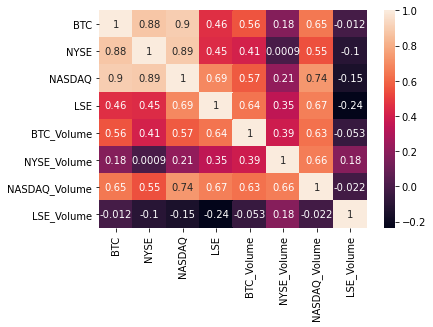

In [10]:
sns.heatmap(corr_matrix,annot = True)

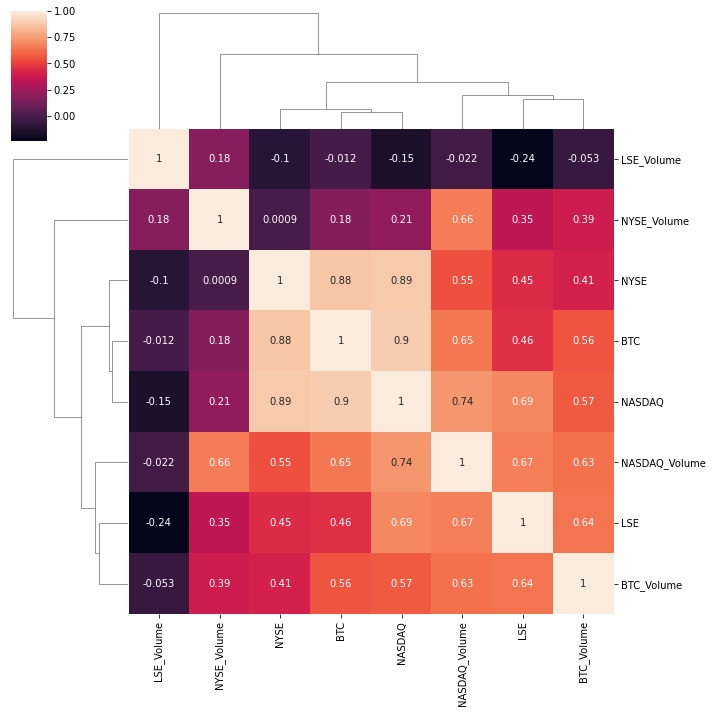

In [11]:
sns.clustermap(corr_matrix,annot = True)

In [12]:
#creating the scatter plot 
def scatter_plot_allcol(df,x,y):
    #here i create the logic
    plt.scatter(df[x],df[y])
    plt.xlabel(x)
    plt.ylabel(y)

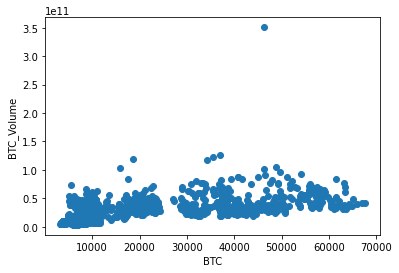

In [13]:
scatter_plot_allcol(df= data,x='BTC',y = 'BTC_Volume')

In [14]:
data.columns

Index(['Date', 'BTC', 'NYSE', 'NASDAQ', 'LSE', 'BTC_Volume', 'NYSE_Volume',
       'NASDAQ_Volume', 'LSE_Volume'],
      dtype='object')

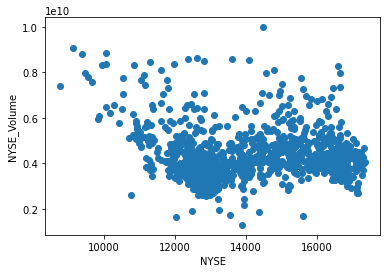

In [15]:
scatter_plot_allcol(df= data,x='NYSE',y = 'NYSE_Volume')

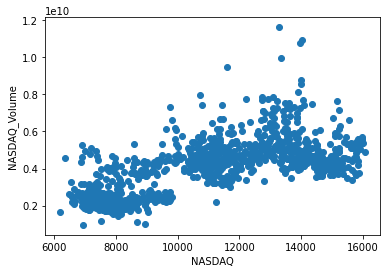

In [16]:
scatter_plot_allcol(df= data,x='NASDAQ',y = 'NASDAQ_Volume')

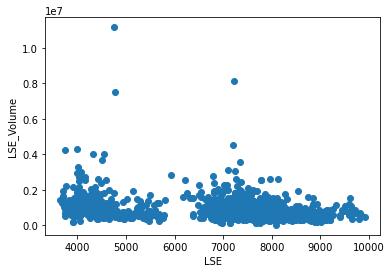

In [17]:
scatter_plot_allcol(df= data,x='LSE',y = 'LSE_Volume')

In [18]:
# data['Date'] = pd.to_datetime(data['Date'],format = '%m-%d-%y')

<AxesSubplot:xlabel='BTC', ylabel='Count'>

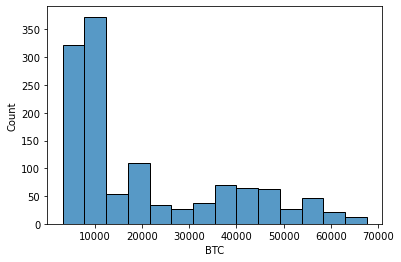

In [19]:
sns.histplot(data['BTC'])

<AxesSubplot:xlabel='NYSE', ylabel='Count'>

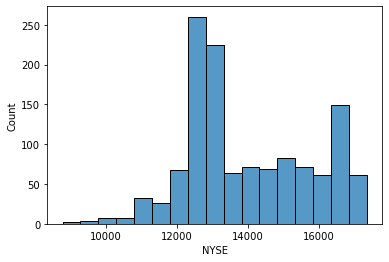

In [20]:
sns.histplot(data['NYSE'])

<AxesSubplot:xlabel='NASDAQ', ylabel='Count'>

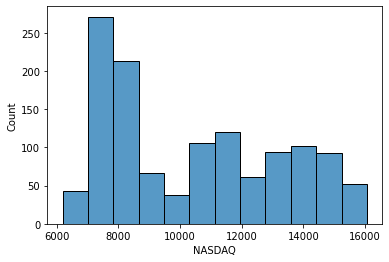

In [21]:
sns.histplot(data['NASDAQ'])

<AxesSubplot:xlabel='LSE', ylabel='Count'>

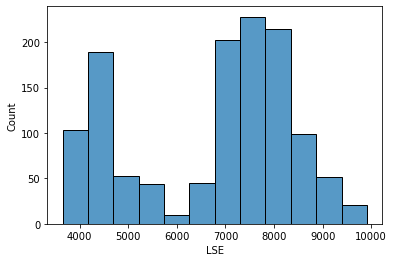

In [22]:
sns.histplot(data['LSE'])

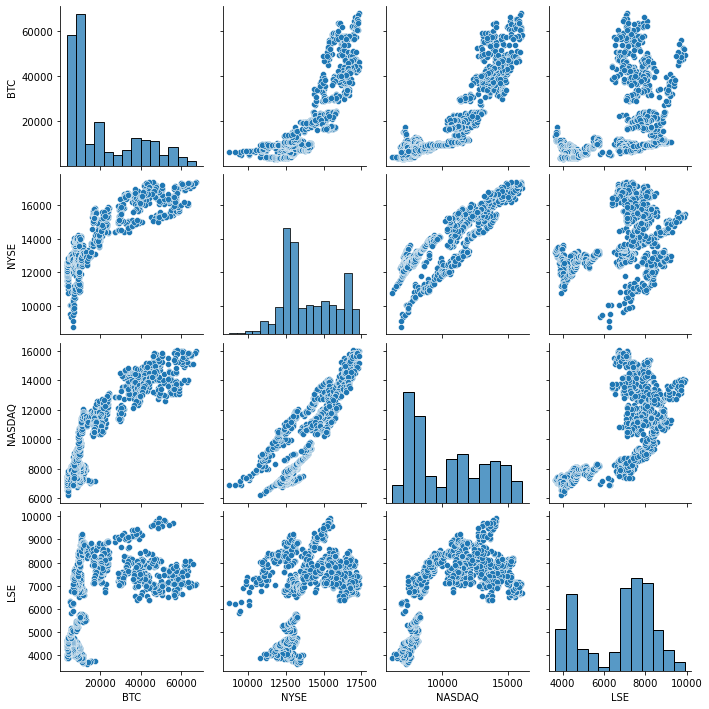

In [23]:
sns.pairplot(data[['BTC','NYSE','NASDAQ','LSE']])

<AxesSubplot:xlabel='variable', ylabel='value'>

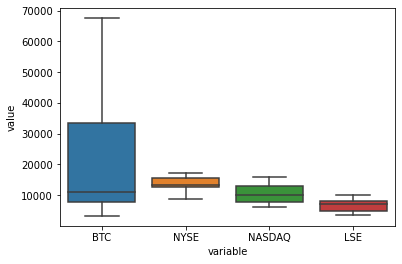

In [24]:
sns.boxplot(x='variable',y ='value',data=pd.melt(data[['BTC','NYSE','NASDAQ','LSE']]))

In [25]:
data.set_index('Date',inplace = True)

In [26]:
data.columns

Index(['BTC', 'NYSE', 'NASDAQ', 'LSE', 'BTC_Volume', 'NYSE_Volume',
       'NASDAQ_Volume', 'LSE_Volume'],
      dtype='object')

In [27]:
df['Year']= pd.DatetimeIndex(df['Date']).year

In [28]:
df

Date          BTC         NYSE        NASDAQ     LSE  \
0     01-02-2018  14982.09961  12902.71973   7006.899902  3742.0   
1     01-03-2018  15201.00000  12957.28027   7065.529785  3749.0   
2     01-04-2018  15599.20020  13028.45996   7077.910156  3749.0   
3     01-05-2018  17429.50000  13103.23047   7136.560059  3758.0   
4     01-08-2018  15170.09961  13114.34961   7157.390137  3744.0   
...          ...          ...          ...           ...     ...   
1254  12/23/2022  16796.95313  15188.45020  10497.860350  7130.0   
1255  12/27/2022  16717.17383  15218.25977  10353.230470  7130.0   
1256  12/28/2022  16552.57227  15037.32031  10213.290040  7128.0   
1257  12/29/2022  16642.34180  15241.20996  10478.089840  7212.0   
1258  12/30/2022  16602.58594  15184.30957  10466.480470  7136.0   

        BTC_Volume  NYSE_Volume  NASDAQ_Volume  LSE_Volume  Year  
0     1.684660e+10   3397430000     1929700000      497857  2018  
1     1.687190e+10   3544030000     2173130000     1009997  2018  
2     2.178320e+10   3697340000     2103220000      669448  2018  
3     2.384090e+10   3239280000     2024000000     2225274  2018  
4     1.841390e+10   3246160000     2055010000      930995  2018  
...            ...          ...            ...         ...   ...  
1254  1.532927e+10   2819280000     3544680000      141614  2022  
1255  1.574858e+10   3030300000     3827290000      141614  2022  
1256  1.700571e+10   3083520000     3842970000      490323  2022  
1257  1.447224e+10   3003680000     4154100000      457006  2022  
1258  1.592916e+10   2979870000     3959030000      226505  2022  

[1259 rows x 10 columns]

<AxesSubplot:xlabel='Year', ylabel='BTC'>

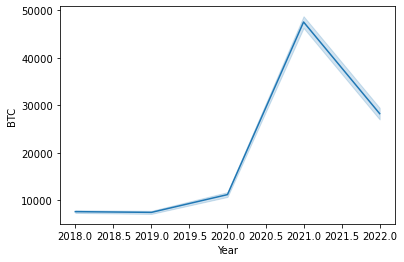

In [29]:
sns.lineplot(x='Year',y='BTC',data= df)

<AxesSubplot:xlabel='Year', ylabel='BTC_Volume'>

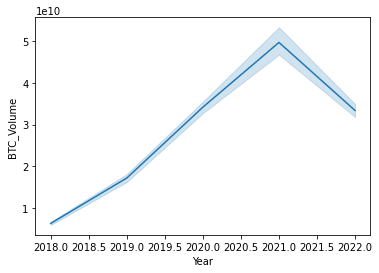

In [30]:
sns.lineplot(x='Year',y='BTC_Volume',data= df)

<AxesSubplot:xlabel='Year', ylabel='NYSE'>

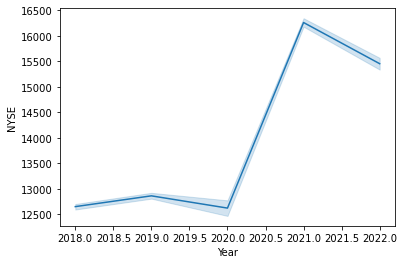

In [31]:
sns.lineplot(x = 'Year',y= 'NYSE',data = df)

<AxesSubplot:xlabel='Year', ylabel='NYSE_Volume'>

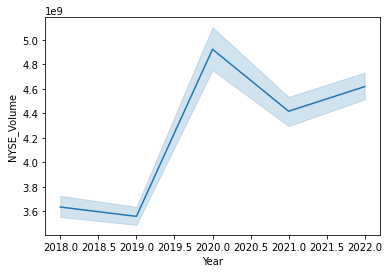

In [32]:
sns.lineplot(x = 'Year',y= 'NYSE_Volume',data = df)

<AxesSubplot:xlabel='Year', ylabel='NASDAQ'>

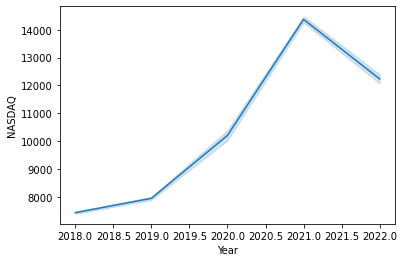

In [33]:
sns.lineplot(x = 'Year',y= 'NASDAQ',data = df)

<AxesSubplot:xlabel='Year', ylabel='NASDAQ_Volume'>

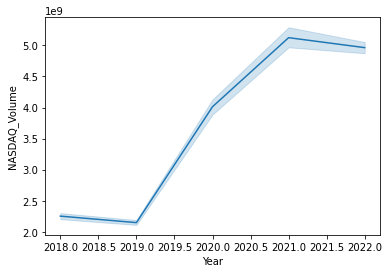

In [34]:
sns.lineplot(x = 'Year',y= 'NASDAQ_Volume',data = df)

<AxesSubplot:xlabel='Year', ylabel='LSE'>

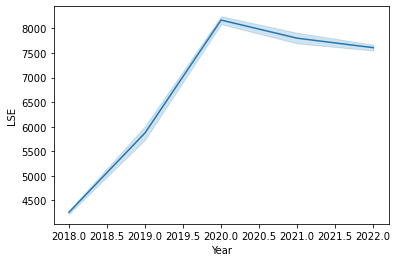

In [35]:
sns.lineplot(x = 'Year',y= 'LSE',data = df)

<AxesSubplot:xlabel='Year', ylabel='LSE_Volume'>

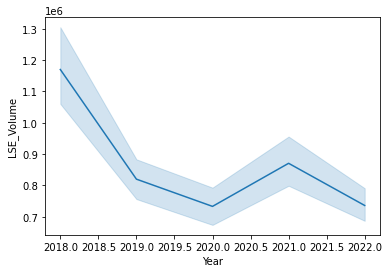

In [36]:
sns.lineplot(x = 'Year',y= 'LSE_Volume',data = df)

<AxesSubplot:xlabel='Year', ylabel='BTC'>

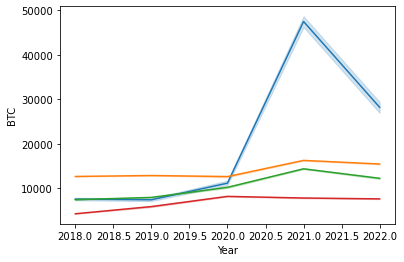

In [37]:
sns.lineplot(x = 'Year',y= 'BTC',data = df)
sns.lineplot(x = 'Year',y= 'NYSE',data = df)
sns.lineplot(x = 'Year',y= 'NASDAQ',data = df)
sns.lineplot(x = 'Year',y= 'LSE',data = df)

<AxesSubplot:xlabel='Year', ylabel='BTC_Volume'>

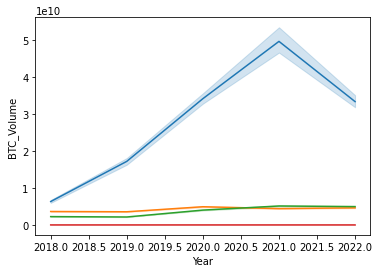

In [38]:
sns.lineplot(x = 'Year',y= 'BTC_Volume',data = df)
sns.lineplot(x = 'Year',y= 'NYSE_Volume',data = df)
sns.lineplot(x = 'Year',y= 'NASDAQ_Volume',data = df)
sns.lineplot(x = 'Year',y= 'LSE_Volume',data = df)

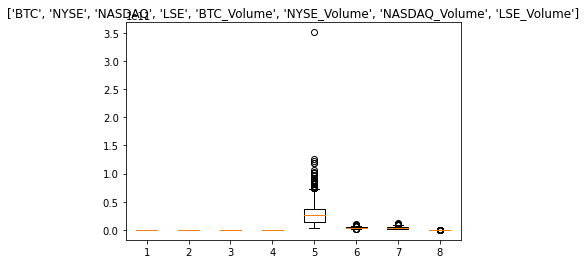

In [39]:
columns = [['BTC','NYSE','NASDAQ','LSE','BTC_Volume','NYSE_Volume','NASDAQ_Volume','LSE_Volume']]
for column in columns:
    fig,ax = plt.subplots()
    ax.boxplot(df[column])
    ax.set_title(column)
    plt.show()

In [40]:
# pip install plotly

In [41]:
import plotly.graph_objects as go
import pandas as pd

In [42]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=df['Date'], y=df['BTC'], mode='lines', name='Bitcoin'))
fig1.update_layout(title='Bitcoin Price in USD', xaxis_title='Date', yaxis_title='Price in USD')
fig1.show()

In [43]:
fig2 = go.Figure()
fig2.add_trace(go.Bar(x=df['Year'], y=df['BTC_Volume'], name='Bitcoin Volume'))
fig2.update_layout(title='Volume of Bitcoin Traded', xaxis_title='Year', yaxis_title='Volume')
fig2.show()

In [44]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=df['Date'], y=df['NYSE'], mode='lines', name='NYSE'))
fig1.update_layout(title='NYSE Price in USD', xaxis_title='Date', yaxis_title='Price in USD')
fig1.show()

In [45]:
fig2 = go.Figure()
fig2.add_trace(go.Bar(x=df['Year'], y=df['NYSE_Volume'], name='NYSE Volume'))
fig2.update_layout(title='Volume of NYSE Traded', xaxis_title='Year', yaxis_title='Volume')
fig2.show()

In [46]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=df['Date'], y=df['NASDAQ'], mode='lines', name='NASDAQ'))
fig1.update_layout(title='NASDAQ Price in USD', xaxis_title='Date', yaxis_title='Price in USD')
fig1.show()

In [47]:
fig2 = go.Figure()
fig2.add_trace(go.Bar(x=df['Year'], y=df['NASDAQ_Volume'], name='NASDAQ Volume'))
fig2.update_layout(title='Volume of NASDAQ Traded', xaxis_title='Year', yaxis_title='Volume')
fig2.show()

In [48]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=df['Date'], y=df['LSE'], mode='lines', name='LSE'))
fig1.update_layout(title='LSE Price in USD', xaxis_title='Date', yaxis_title='Price in USD')
fig1.show()

In [49]:
fig2 = go.Figure()
fig2.add_trace(go.Bar(x=df['Year'], y=df['LSE_Volume'], name='LSE Volume'))
fig2.update_layout(title='Volume of LSE Traded', xaxis_title='Year', yaxis_title='Volume')
fig2.show()

# Model Data preparation

In [50]:
train_size = int(len(df) * 0.7)
df_train, df_test = df.iloc[:train_size], df.iloc[train_size:]

In [51]:
df_train.shape,df_test.shape

((881, 10), (378, 10))

In [52]:
df_train.isnull().sum()

Date             0
BTC              0
NYSE             0
NASDAQ           0
LSE              0
BTC_Volume       0
NYSE_Volume      0
NASDAQ_Volume    0
LSE_Volume       0
Year             0
dtype: int64

In [53]:
df_test.isnull().sum()

Date             0
BTC              0
NYSE             0
NASDAQ           0
LSE              0
BTC_Volume       0
NYSE_Volume      0
NASDAQ_Volume    0
LSE_Volume       0
Year             0
dtype: int64

# Stationary test

In [54]:
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import time

In [55]:
result = adfuller(df_train['BTC'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -0.9935010963702875
p-value: 0.7556272404941118
Critical Values: {'1%': -3.4379766581448803, '5%': -2.8649066016199836, '10%': -2.5685626352082207}


In [56]:
if result[0] > result[4]['5%']:
    print('The time series is non-stationary. Applying differencing...')
    train_data_diff = df_train['BTC'].diff().dropna()
else:
    train_data_diff = df_train['BTC']

The time series is non-stationary. Applying differencing...


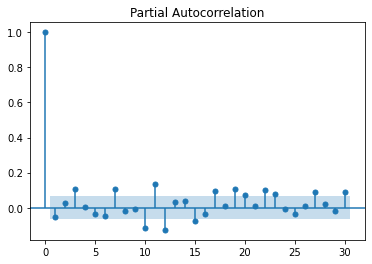

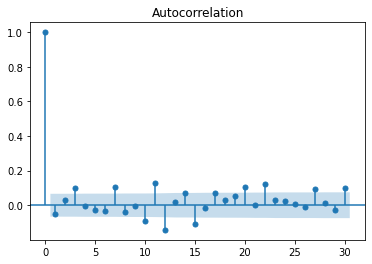

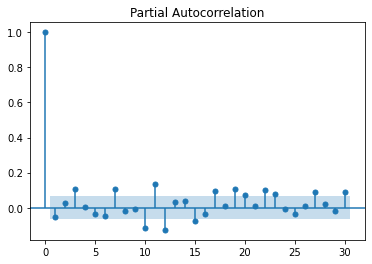

In [57]:
plot_acf(train_data_diff, lags=30)
plot_pacf(train_data_diff, lags=30)

In [58]:
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score
import time
# from fbprophet import Prophet

In [60]:
pip install fbprophet --user

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.6.0-py3-none-any.whl (13 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached holidays-0.22-py3-none-any.whl (412 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached backports.zoneinfo-0.2.1-cp38-cp38-win_amd64.whl (38 kB)


  ERROR: Command errored out with exit status 1:
   command: 'C:\ProgramData\Anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\sibas\\AppData\\Local\\Temp\\pip-install-oy4ogqzq\\fbprophet_32d3d758754e43afbf18ecf7013d04c0\\setup.py'"'"'; __file__='"'"'C:\\Users\\sibas\\AppData\\Local\\Temp\\pip-install-oy4ogqzq\\fbprophet_32d3d758754e43afbf18ecf7013d04c0\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\sibas\AppData\Local\Temp\pip-wheel-sui36vby'
       cwd: C:\Users\sibas\AppData\Local\Temp\pip-install-oy4ogqzq\fbprophet_32d3d758754e43afbf18ecf7013d04c0\
  Complete output (44 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\fbprophet
  creating build\lib\fbprophet\stan_model
  Traceback (most recent call last):
    File 


  Using cached pystan-3.5.0-py3-none-any.whl (13 kB)
  Using cached aiohttp-3.8.4-cp38-cp38-win_amd64.whl (324 kB)
  Using cached pystan-3.4.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.3.0-py3-none-any.whl (13 kB)
  Using cached pysimdjson-3.2.0-cp38-cp38-win_amd64.whl (151 kB)
  Using cached pystan-3.2.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.1.1-py3-none-any.whl (13 kB)
  Using cached pystan-3.1.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.0.2-py3-none-any.whl (13 kB)
  Using cached pystan-3.0.1-py3-none-any.whl (12 kB)
  Using cached pystan-3.0.0-py3-none-any.whl (12 kB)
  Using cached pystan-2.19.1.1-cp38-cp38-win_amd64.whl (79.8 MB)
  Running setup.py clean for fbprophet
Failed to build fbprophet
    Running setup.py install for fbprophet: started
    Running setup.py install for fbprophet: finished with status 'error'



  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
    ERROR: Command errored out with exit status 1:
     command: 'C:\ProgramData\Anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\sibas\\AppData\\Local\\Temp\\pip-install-oy4ogqzq\\fbprophet_32d3d758754e43afbf18ecf7013d04c0\\setup.py'"'"'; __file__='"'"'C:\\Users\\sibas\\AppData\\Local\\Temp\\pip-install-oy4ogqzq\\fbprophet_32d3d758754e43afbf18ecf7013d04c0\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record 'C:\Users\sibas\AppData\Local\Temp\pip-record-u_h7b_x1\install-record.txt' --single-version-externally-managed --user --prefix= --compile --install-headers 'C:\Users\sibas

# Model

In [61]:
model = ARIMA(df_train['BTC'], order=(2,1,2))
start_time = time.time()
model_fit = model.fit()
train_time = time.time() - start_time

In [62]:
predictions = model_fit.predict(start=len(df_train), end=len(df)-1, dynamic=False)
mse = mean_squared_error(df_test['BTC'], predictions)
rmse = sqrt(mse)

In [63]:
accuracy = 1 - (rmse / df_test['BTC'].mean())

In [64]:
accuracy

0.6022198605936899

In [65]:
# f1 = f1_score(df_test['BTC'], predictions, average='macro')

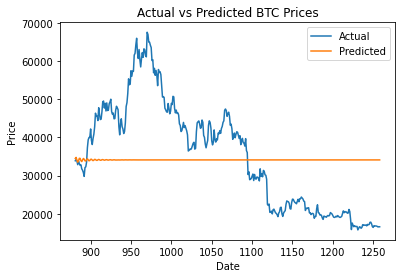

In [66]:
plt.plot(df_test.index, df_test['BTC'], label='Actual')
plt.plot(df_test.index, predictions, label='Predicted')
plt.title('Actual vs Predicted BTC Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [73]:
df['Date'] = pd.to_datetime(df['Date'])

In [74]:
last_date = df['Date'].max()

In [75]:
date_range = pd.date_range(start=last_date, end='2023-01-31', freq='D')

# Create a DataFrame with the date range
future_df = pd.DataFrame({'Date': date_range})

# Print the DataFrame
print(future_df.head())

        Date
0 2022-12-30
1 2022-12-31
2 2023-01-01
3 2023-01-02
4 2023-01-03


In [67]:
forecast = model_fit.forecast(steps=31)

In [77]:
type(forecast)

pandas.core.series.Series

In [78]:
forecast_df = forecast.to_frame(name="BTC")

In [80]:
# forecast_df

In [69]:
# forecast_df = pd.DataFrame(forecast, columns=['BTC'])

In [81]:
forecast_df.index = pd.date_range(start='2023-01-01', periods=len(forecast_df), freq='D')
forecast_df.to_csv('predicted_btc_prices.csv')

In [82]:
forecast_df

BTC
2023-01-01  34493.875148
2023-01-02  34777.043615
2023-01-03  34087.354102
2023-01-04  33530.397849
2023-01-05  33893.126377
2023-01-06  34547.040047
2023-01-07  34516.660215
2023-01-08  33924.629038
2023-01-09  33688.466372
2023-01-10  34107.323319
2023-01-11  34502.361031
2023-01-12  34307.303997
2023-01-13  33871.140334
2023-01-14  33849.923801
2023-01-15  34226.381886
2023-01-16  34412.413628
2023-01-17  34162.006198
2023-01-18  33886.162938
2023-01-19  33985.146875
2023-01-20  34273.170860
2023-01-21  34313.566898
2023-01-22  34076.693084
2023-01-23  33935.710291
2023-01-24  34082.639438
2023-01-25  34272.651219
2023-01-26  34227.081973
2023-01-27  34038.727426
2023-01-28  33995.357408
2023-01-29  34142.729896
2023-01-30  34246.578252
2023-01-31  34162.334217